### Máquinas de Soporte Vectorial Lineal

Las máquinas de soporte vectorial son un tipo de modelo de datos  desarrollados por Vladimir Vapnik en 1996. En la clasificación binaria, el objetivo de este método es encontrar el hiperplano separador óptimo entre las dos clases y maximizar la distancia al punto más cercano de cada una de las clases

Este método provee una única solución al problema de clasificación encontrando el hiperplano separador óptimo pero también mejora su desempeño en los datos de prueba debido a la maximización del margen entre las clases.

Sin embargo, no todos los problemas de clasificación pueden ser linealmente separables, entonces las máquinas de soporte vectorial permiten la clasificación incorrecta tratando de minimizar la misma a través de una medida de superposición.

<img src="svm.png" weigth="100px">

El plano estimado estará dado de la siguiente manera:
$$
\hat{H}(x)=\hat{\alpha}_0+\sum_{i=1}^n \hat{\alpha}_i Y_i \langle x,X_i \rangle
$$

Cuando un conjunto de datos no es separable se mapear la covariables que toman valores 
en $\mathcal{X}$ a un espacio de mayor dimensión $\mathcal{Z}$

<img src="kernel.png" weigth="100px">

Donde $K(x,\bar{x})=\langle \phi(x), \phi(\bar{x}) \rangle$ es el llamado kernel, algunos ejemplos de estos son:
1. Polinomial $K(x,\bar{x})=\left(\langle x,\bar{x} \rangle+a\right)^r$
2. Sigmoide $K(x,\bar{x})=tanh \left(a\langle x,\bar{x} \rangle+a\right)$
3. Gausiana $K(x,\bar{x})=\exp \left(-|| x-\bar{x}||^2/2\sigma^2 \right)$

In [1]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from   sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
X, y = make_blobs(n_samples=200, centers=2, random_state=6)

#### SVM con kernel lineal 

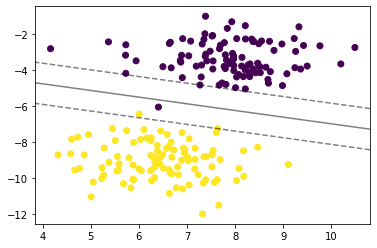

In [3]:
svmm = svm.SVC(kernel='linear', C=1)
svmm.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x0 = np.linspace(xlim[0], xlim[1], 100)
y0 = np.linspace(ylim[0], ylim[1], 100)
x1,y1=np.meshgrid(x0,y0)
xy = np.vstack([x1.ravel(), y1.ravel()]).T
z =svmm.decision_function(xy).reshape(y1.shape)
ax.contour(x1, y1, z, colors='k', levels=[-1,0,1], alpha=0.5,
           linestyles=['--','-','--'])
plt.show()

#### SVM con kernel sigmoide

#### Linear SVC de Sklearn 

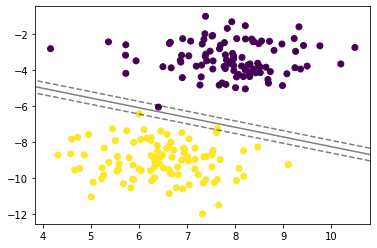

In [4]:
svmlinear = svm.LinearSVC(C=100,max_iter=100000)
svmlinear.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x1 = np.linspace(xlim[0], xlim[1], 100)
y1 = np.linspace(ylim[0], ylim[1], 100)
xx1,yy1=np.meshgrid(x1,y1)
xy = np.vstack([xx1.ravel(), yy1.ravel()]).T
z =svmlinear.decision_function(xy).reshape(yy1.shape)
ax.contour(xx1, yy1, z, colors='k', levels=[-1,0,1], alpha=0.5,
           linestyles=['--','-','--'])
plt.show()

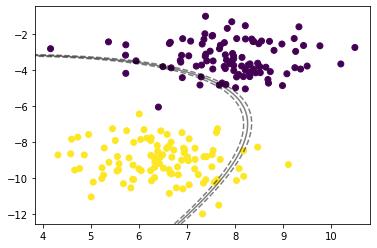

In [5]:
svmsig = svm.SVC(kernel='sigmoid',C=100)
svmsig=svmsig.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x1 = np.linspace(xlim[0], xlim[1], 100)
y1 = np.linspace(ylim[0], ylim[1], 100)
xx1,yy1=np.meshgrid(x1,y1)
xy = np.vstack([xx1.ravel(), yy1.ravel()]).T
z =svmsig.decision_function(xy).reshape(yy1.shape)
ax.contour(xx1, yy1, z, colors='k', levels=[-1,0,1], alpha=0.5,
           linestyles=['--','-','--'])
plt.show()

#### SVM con datadeIris

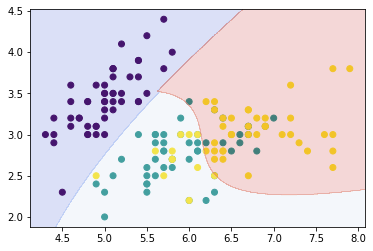

In [6]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target
X0,X1=X[:,0],X[:,1]
plt.scatter(X0,X1,c=y)
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
x3=np.linspace(xlim[0],xlim[1],1000)
y3=np.linspace(ylim[0],ylim[1],1000)
xx3,yy3=np.meshgrid(x3,y3)
xy=np.vstack([xx3.ravel(),yy3.ravel()]).T
modiris=svm.SVC(kernel='poly',degree=3,C=1000000)
modeloiris=modiris.fit(X,y)
z=modiris.predict(xy).reshape(xx3.shape)
ax.contourf(xx3,yy3,z,cmap=plt.cm.coolwarm,alpha=0.2)
#ax.set_position([0, 0, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, test_size=0.30, random_state=42)

In [8]:
modelsvm=svm.SVC(kernel='poly',degree=3,probability=True)
modelsvm.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

In [9]:
print("model score: %.3f" % modelsvm.score(X_test, y_test))

model score: 0.978


array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.07142857],
       [0.        , 0.        , 0.92857143]])

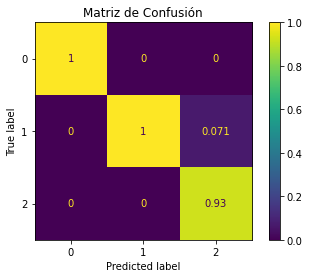

In [10]:
disp=metrics.plot_confusion_matrix(modelsvm, X_test, y_test,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix